In [513]:
#Importation des librairies
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nlp_module import remove_stopwords, plot_top_words, tok, print_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import NMF, LatentDirichletAllocation
import ast
import missingno as msno

pd.set_option("display.max_columns", None)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [514]:
df = pd.read_csv("df.csv", sep=',')

In [515]:
df = df.sample(frac=0.1,random_state=1)

<AxesSubplot:>

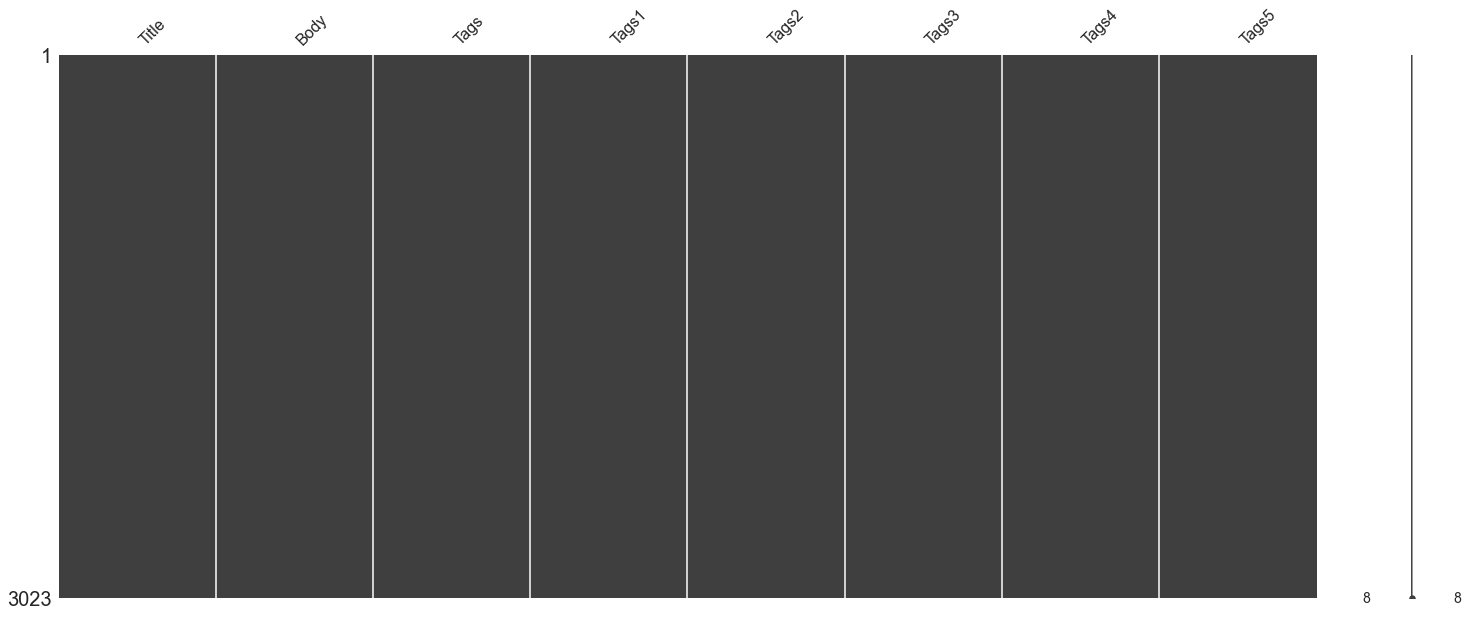

In [516]:
msno.matrix(df)

In [517]:
df = df.reset_index()

In [518]:
df.isnull().sum().sum()

0

In [519]:
df = df.dropna()

In [520]:
df['Tags']=df['Tags'].str.replace("'","")
df['Tags']=df['Tags'].str.replace("[","")
df['Tags']=df['Tags'].str.replace("]","")
df['Tags']=df['Tags'].str.replace(","," ")


In [521]:
df

,index,Title,Body,Tags,Tags1,Tags2,Tags3,Tags4,Tags5
0,28721,Create Seamless Loop Audio - Web,I want create seamless loop audio file. But ap...,javascript html forms,javascript,html,forms,None,None
1,19745,OnItemClickListener using ArrayAdapter ListView,I want OnItemClickListener ListView I create u...,php iphone objective-c ios,php,iphone,objective-c,ios,None
2,23113,Rails 4.2 - Sidekiq sending emails development,I rails app I method I send lot emails. I woul...,ruby,ruby,None,None,None,None
3,17120,Babel unexpected token import running mocha tests,"The solutions offered related questions, inclu...",c++ image-processing,c++,image-processing,None,None,None
4,88,Iphone safari resizing viewport keyboard open,Mobile safari ' update window.innerHeight keyb...,html ios css,html,ios,css,None,None
...,...,...,...,...,...,...,...,...,...
3018,16688,How I validate incoming JSON data inside REST ...,A rest service needs validate incoming json da...,java json validation rest,java,json,validation,rest,None
3019,20032,POST file string using cURL PHP?,I wondering possible post file - along form da...,ios iphone,ios,iphone,None,None,None
3020,25007,Flutter - Validate phone number using Regex,"In Flutter mobile app, I trying validate phone...",javascript node.js typescript express,javascript,node.js,typescript,express,None
3021,14498,Why PostgreSQL array access much faster C PL/p...,"I table schema includes int array column, cust...",.net sql sql-server,.net,sql,sql-server,None,None


In [522]:
df.dtypes

index     int64
Title    object
Body     object
Tags     object
Tags1    object
Tags2    object
Tags3    object
Tags4    object
Tags5    object
dtype: object

In [523]:
df.head

<bound method NDFrame.head of       index                                              Title  \
0     28721                   Create Seamless Loop Audio - Web   
1     19745    OnItemClickListener using ArrayAdapter ListView   
2     23113     Rails 4.2 - Sidekiq sending emails development   
3     17120  Babel unexpected token import running mocha tests   
4        88      Iphone safari resizing viewport keyboard open   
...     ...                                                ...   
3018  16688  How I validate incoming JSON data inside REST ...   
3019  20032                   POST file string using cURL PHP?   
3020  25007        Flutter - Validate phone number using Regex   
3021  14498  Why PostgreSQL array access much faster C PL/p...   
3022  11769  Optimal plugins project use IntelliJ IDEA Java...   

                                                   Body  \
0     I want create seamless loop audio file. But ap...   
1     I want OnItemClickListener ListView I create u...   


In [524]:
df["full_text"] = df["Title"] + df["Body"]

In [525]:
df["full_text"]

0       Create Seamless Loop Audio - WebI want create ...
1       OnItemClickListener using ArrayAdapter ListVie...
2       Rails 4.2 - Sidekiq sending emails development...
3       Babel unexpected token import running mocha te...
4       Iphone safari resizing viewport keyboard openM...
                              ...                        
3018    How I validate incoming JSON data inside REST ...
3019    POST file string using cURL PHP?I wondering po...
3020    Flutter - Validate phone number using RegexIn ...
3021    Why PostgreSQL array access much faster C PL/p...
3022    Optimal plugins project use IntelliJ IDEA Java...
Name: full_text, Length: 3023, dtype: object

In [526]:
bow_vectorizer = CountVectorizer(ngram_range = (1,1),
                                 tokenizer=tok)
text_bow = bow_vectorizer.fit_transform(df["full_text"])

In [527]:
lda = LatentDirichletAllocation(random_state=42,
                                batch_size=400)

params = {'n_components' : [8, 9, 10],
          "learning_decay" : [0.5, 0.7, 0.9],
          "learning_method" : ["batch", "online"]}

gridsearch_lda = GridSearchCV(lda,
                              param_grid=params,
                              cv=5,
                              verbose=2)
#gridsearch_lda.fit(text_bow)

In [528]:
#best_lda_model = gridsearch_lda.best_estimator_

#print("Best Model's Params: ", gridsearch_lda.best_params_)
#print("Best Log Likelihood Score: ", gridsearch_lda.best_score_)

In [529]:
import pyLDAvis

# Visualize the topics
#pyLDAvis.enable_notebook()
#panel = pyLDAvis.sklearn.prepare(best_lda_model, text_bow, bow_vectorizer, mds='tsne')
#panel

In [530]:
df["Tags1"].describe()

count     3023
unique     107
top       java
freq       386
Name: Tags1, dtype: object

In [531]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [532]:
matrix = tf.fit_transform(df['full_text'])

In [533]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(matrix,matrix)
cosine_similarities

array([[1.        , 0.00279313, 0.0020388 , ..., 0.00565299, 0.00704954,
        0.00319017],
       [0.00279313, 1.        , 0.00215868, ..., 0.00282409, 0.00474326,
        0.00167242],
       [0.0020388 , 0.00215868, 1.        , ..., 0.00162917, 0.0010241 ,
        0.00297133],
       ...,
       [0.00565299, 0.00282409, 0.00162917, ..., 1.        , 0.00596483,
        0.002047  ],
       [0.00704954, 0.00474326, 0.0010241 , ..., 0.00596483, 1.        ,
        0.        ],
       [0.00319017, 0.00167242, 0.00297133, ..., 0.002047  , 0.        ,
        1.        ]])

In [534]:
post_title = df['Title']

indices = pd.Series(df.index, index=df['Title'])

In [535]:
def post_recommend(original_title):

    
    idx = indices[original_title]

    sim_scores = list(enumerate(cosine_similarities[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:31]

    movie_indices = [i[0] for i in sim_scores]

    return df.iloc[movie_indices]

In [536]:
def recommend_tags(original_title, sample_size):
    posts = post_recommend(original_title).head(sample_size)
    
    tags = posts["Tags"].apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts()
    return tags

### MLKNN

In [537]:

tags_array=df['Tags'].to_numpy()
df2 = pd.DataFrame(tags_array, columns=['Tags'])

coun_vect = CountVectorizer(tokenizer=lambda txt: txt.split())

count_matrix  = coun_vect.fit_transform(df2["Tags"])
count_array = count_matrix.toarray()

y = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())

y.replace(2,1,inplace= True)
y.replace(3,1,inplace= True)
y.replace(4,1,inplace= True)


In [538]:
df2

,Tags
0,javascript html forms
1,php iphone objective-c ios
2,ruby
3,c++ image-processing
4,html ios css
...,...
3018,java json validation rest
3019,ios iphone
3020,javascript node.js typescript express
3021,.net sql sql-server


In [539]:
y.sum(axis=1)

0       3
1       4
2       1
3       2
4       3
       ..
3018    4
3019    2
3020    4
3021    3
3022    3
Length: 3023, dtype: int64

In [540]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [541]:
df2

,Tags
0,javascript html forms
1,php iphone objective-c ios
2,ruby
3,c++ image-processing
4,html ios css
...,...
3018,java json validation rest
3019,ios iphone
3020,javascript node.js typescript express
3021,.net sql sql-server


In [542]:
from sklearn.model_selection import train_test_split

X = df["full_text"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25)

In [543]:
vectorizer = CountVectorizer(ngram_range = (1,1),
                                 tokenizer=tok)

vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [544]:
X_train_vec = X_train_vec.toarray()
y_train = np.array(y_train)

In [545]:
X_test_vec = X_test_vec.toarray()
y_test = np.array(y_test)

In [546]:
vectorizer.vocabulary_

{'difference': 19762,
 'initializing': 27152,
 'static': 43851,
 'variable': 48798,
 'inline': 27197,
 'constructor': 17462,
 'c#i': 14805,
 'would': 50116,
 'like': 29845,
 'know': 29213,
 'member': 31447,
 ':': 7832,
 'class': 15955,
 'foo': 23204,
 '{': 50901,
 'private': 37425,
 'bar': 13604,
 'bar_': 13611,
 '=': 9135,
 'new': 33278,
 'bar(': 13605,
 ')': 341,
 ';': 7834,
 '}': 50902,
 'inside': 27326,
 'foo(': 23205,
 'firebase': 22849,
 'rest': 39957,
 'auth': 13091,
 'creating': 18129,
 'token': 46462,
 'node.js': 33517,
 'admin': 11254,
 'sdki': 41126,
 'issue': 28025,
 'asked': 12728,
 'lot': 30545,
 ',': 742,
 'i': 26208,
 'still': 43966,
 'cannot': 15120,
 'seem': 41296,
 'find': 22793,
 'exact': 21740,
 'answer': 11979,
 'solve': 42887,
 'problem.': 37456,
 'wish': 49958,
 'access': 10910,
 'using': 48402,
 'calls': 15057,
 'adding': 11187,
 'access_token': 10924,
 'param.': 35899,
 'the': 45911,
 'created': 18095,
 'sdk': 41122,
 'following': 23179,
 'code': 16329,
 'var'

In [547]:
from skmultilearn.adapt import MLkNN

#parameters = {'k': range(1), 's': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
#score = 'f1_macro'

#clf = GridSearchCV(MLkNN(), parameters, scoring=score)
#clf.fit(X_train_vec, y_train)

#print (clf.best_params_, clf.best_score_)



In [548]:
mlknn_clf = MLkNN(k=2,s=1)
mlknn_clf.fit(X_train_vec, y_train)

MLkNN(k=2, s=1)

In [549]:
y_pred = mlknn_clf.predict(X_test_vec)

In [550]:
y_pred = y_pred.tocsc()
y_pred = y_pred.toarray()

In [551]:
coun_vect.inverse_transform(y_pred)

[array(['ios', 'java', 'json', 'rest'], dtype='<U19'),
 array(['javascript', 'sql-server'], dtype='<U19'),
 array(['javascript'], dtype='<U19'),
 array(['android', 'image-processing', 'ruby', 'ruby-on-rails'],
       dtype='<U19'),
 array(['javascript'], dtype='<U19'),
 array(['multithreading', 'numpy', 'performance', 'sql-server'],
       dtype='<U19'),
 array(['android', 'ios', 'multithreading'], dtype='<U19'),
 array(['linux', 'mysql', 'sql'], dtype='<U19'),
 array(['angularjs', 'image'], dtype='<U19'),
 array(['javascript'], dtype='<U19'),
 array(['gcc'], dtype='<U19'),
 array(['django', 'forms', 'laravel', 'php'], dtype='<U19'),
 array(['c++', 'java', 'performance', 'spring'], dtype='<U19'),
 array(['c++'], dtype='<U19'),
 array([], dtype='<U19'),
 array(['c', 'javascript', 'performance'], dtype='<U19'),
 array(['javascript'], dtype='<U19'),
 array([], dtype='<U19'),
 array(['opencv', 'python'], dtype='<U19'),
 array(['javascript'], dtype='<U19'),
 array(['numpy', 'python-3.x', 'w

In [552]:
coun_vect.inverse_transform(y_test)

[array(['parsing', 'python', 'xml'], dtype='<U19'),
 array(['algorithm', 'c', 'data-structures'], dtype='<U19'),
 array(['django', 'python'], dtype='<U19'),
 array(['android', 'ios', 'mysql', 'php'], dtype='<U19'),
 array(['mysql', 'php', 'unicode'], dtype='<U19'),
 array(['haskell', 'scala'], dtype='<U19'),
 array(['algorithm', 'math'], dtype='<U19'),
 array(['apache-spark', 'java', 'scala'], dtype='<U19'),
 array(['android'], dtype='<U19'),
 array(['jquery'], dtype='<U19'),
 array(['ios', 'xcode'], dtype='<U19'),
 array(['c#', 'entity-framework', 'sql', 'winforms'], dtype='<U19'),
 array(['git'], dtype='<U19'),
 array(['c#', 'c++'], dtype='<U19'),
 array(['html', 'sockets'], dtype='<U19'),
 array(['c++'], dtype='<U19'),
 array(['dataframe', 'pandas', 'python'], dtype='<U19'),
 array(['image', 'python', 'python-3.x'], dtype='<U19'),
 array(['database', 'java', 'postgresql'], dtype='<U19'),
 array(['memory', 'memory-management', 'multithreading'], dtype='<U19'),
 array(['wpf', 'xaml'],

In [553]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [554]:
df_test = pd.DataFrame(y_test)
df_test.sum(axis=1)

0      3
1      3
2      2
3      4
4      3
      ..
751    2
752    3
753    2
754    2
755    2
Length: 756, dtype: int64

In [555]:
def custom_score(test,pred):

    total_accuracy=0
    accuracy=0
    size = len(pred)
    for i in range(size):
        goal = len(test[i])
        score = 0
        for value in test[i]:
            if(value in pred[i]):
                score+=1
            #print(value)
            #print(coun_vect.inverse_transform(y_pred)[i])
        accuracy = score*(100/goal)
        total_accuracy+=accuracy
    print("Accuracy : ",total_accuracy/size)



In [556]:
custom_score(coun_vect.inverse_transform(y_test),coun_vect.inverse_transform(y_pred))

Accuracy :  6.432980599647268


In [557]:
for val in coun_vect.inverse_transform(y_pred):
    print(val)

['ios' 'java' 'json' 'rest']
['javascript' 'sql-server']
['javascript']
['android' 'image-processing' 'ruby' 'ruby-on-rails']
['javascript']
['multithreading' 'numpy' 'performance' 'sql-server']
['android' 'ios' 'multithreading']
['linux' 'mysql' 'sql']
['angularjs' 'image']
['javascript']
['gcc']
['django' 'forms' 'laravel' 'php']
['c++' 'java' 'performance' 'spring']
['c++']
[]
['c' 'javascript' 'performance']
['javascript']
[]
['opencv' 'python']
['javascript']
['numpy' 'python-3.x' 'wpf' 'xaml']
['javascript' 'visual-studio']
[]
['php']
[]
['django' 'visual-studio']
['ios']
['android']
['algorithm' 'math' 'python']
['ios' 'wpf']
['javascript' 'php']
['android' 'date']
['c']
['c++']
['javascript']
['numpy' 'rest']
[]
['git' 'ios']
['java']
['c' 'c++' 'gcc']
['c++' 'optimization']
['javascript' 'visual-studio']
['javascript' 'ruby-on-rails' 'unit-testing']
['ios' 'performance' 'python-3.x']
['java' 'php']
['c++' 'multithreading']
['c' 'c++' 'class' 'gcc' 'java' 'security']
['numpy']


In [558]:
for val in coun_vect.inverse_transform(y_test):
    print(val)

['parsing' 'python' 'xml']
['algorithm' 'c' 'data-structures']
['django' 'python']
['android' 'ios' 'mysql' 'php']
['mysql' 'php' 'unicode']
['haskell' 'scala']
['algorithm' 'math']
['apache-spark' 'java' 'scala']
['android']
['jquery']
['ios' 'xcode']
['c#' 'entity-framework' 'sql' 'winforms']
['git']
['c#' 'c++']
['html' 'sockets']
['c++']
['dataframe' 'pandas' 'python']
['image' 'python' 'python-3.x']
['database' 'java' 'postgresql']
['memory' 'memory-management' 'multithreading']
['wpf' 'xaml']
['numpy' 'opencv' 'python-3.x']
['ios' 'xcode']
['java' 'linux' 'unix']
['c#' 'visual-studio-2010']
['ios']
['java' 'unit-testing']
['.net' 'c#' 'winforms']
['algorithm' 'math']
['java' 'mongodb' 'performance' 'spring']
['data-structures']
['jquery' 'validation']
['ios' 'xcode']
['gcc']
['java' 'security' 'spring-boot']
['laravel' 'php']
['asp.net' 'asp.net-web-api' 'c#' 'web-services']
['cocoa-touch' 'ios' 'iphone' 'objective-c']
['swift' 'xcode']
['arrays' 'javascript']
['git']
['ios']
['j

In [559]:
coun_vect.inverse_transform(y_pred)[1]

array(['javascript', 'sql-server'], dtype='<U19')

In [560]:
'net' in coun_vect.inverse_transform(y_pred)[1]

False

TODO:
remove les empty
refaire la précision avec jacquard
trouver la meilleure approche
piste d'amélioration deep learning
utilisation de faiss plus proche voisin de facebook
utilisation de fastext (facebook) vectorisation